In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.path import Path 


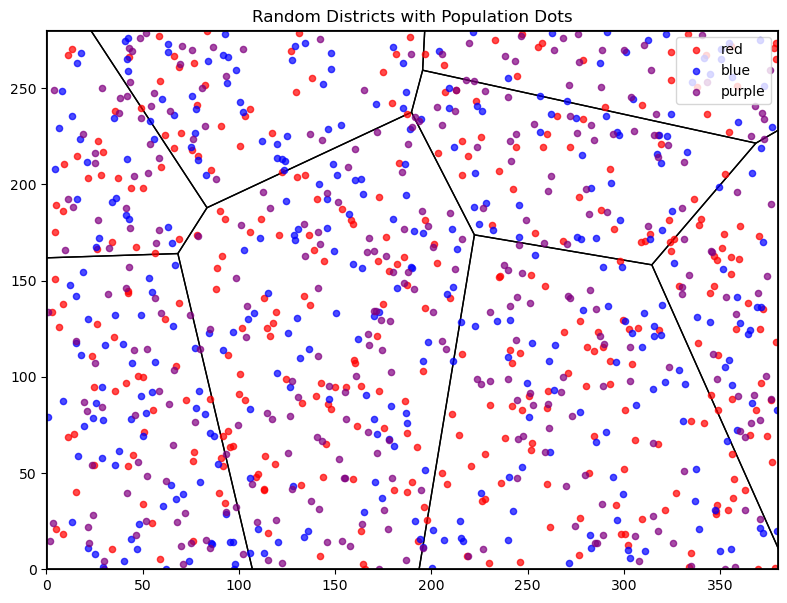

District 1: {'red': 22, 'blue': 23, 'purple': 25}
District 2: {'red': 88, 'blue': 74, 'purple': 87}
District 3: {'red': 32, 'blue': 35, 'purple': 35}
District 4: {'red': 22, 'blue': 21, 'purple': 22}
District 5: {'red': 30, 'blue': 42, 'purple': 23}
District 6: {'red': 41, 'blue': 61, 'purple': 44}
District 7: {'red': 32, 'blue': 21, 'purple': 23}
District 8: {'red': 76, 'blue': 65, 'purple': 56}


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.path import Path  # Needed for point-in-polygon checks

# --- Voronoi helpers (keep your existing functions) ---
def voronoi_finite_polygons_2d(vor, radius=1000):
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    all_ridges = {}

    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region_index in enumerate(vor.point_region):
        region = vor.regions[region_index]
        if -1 not in region:
            new_regions.append(region)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in region if v != -1]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])
            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius
            new_vertices.append(far_point.tolist())
            new_region.append(len(new_vertices) - 1)

        new_regions.append(new_region)

    return new_regions, np.array(new_vertices)

def sort_polygon(points):
    center = points.mean(axis=0)
    angles = np.arctan2(points[:,1] - center[1], points[:,0] - center[0])
    return points[np.argsort(angles)]

# --- Simulation parameters ---
WIDTH = 380
HEIGHT = 280
NUM_DISTRICTS = 8 #congressional districts 
NUM_DOTS = 1000  # Number of population dots
COLORS = ['red', 'blue', 'purple']

# --- Generate random district centers and Voronoi ---
points = np.random.rand(NUM_DISTRICTS, 2)
points[:,0] *= WIDTH
points[:,1] *= HEIGHT
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)

# --- Generate random population dots ---
dots_x = np.random.rand(NUM_DOTS) * WIDTH
dots_y = np.random.rand(NUM_DOTS) * HEIGHT
dots_colors = np.random.choice(COLORS, NUM_DOTS)

# --- Count dots per district ---
district_counts = []  # List of dictionaries for each district

fig, ax = plt.subplots(figsize=(10, 7))

for region in regions:
    polygon = vertices[region]
    if len(polygon) < 3:
        district_counts.append({'red':0, 'blue':0, 'purple':0})
        continue
    polygon = sort_polygon(polygon)
    
    # Draw the district boundary
    ax.fill(polygon[:,0], polygon[:,1], edgecolor='black', fill=False, linewidth=1)
    
    # Create a Path object for point-in-polygon testing
    poly_path = Path(polygon)
    mask = poly_path.contains_points(np.column_stack((dots_x, dots_y)))
    
    # Count dots by color inside this district
    counts = {color: 0 for color in COLORS}
    for color, inside in zip(dots_colors, mask):
        if inside:
            counts[color] += 1
    district_counts.append(counts)

# --- Draw the population dots ---
for color in COLORS:
    ax.scatter(dots_x[dots_colors==color], dots_y[dots_colors==color], 
               c=color, label=color, s=20, alpha=0.7)

# Colorado boundary
ax.plot([0, WIDTH, WIDTH, 0, 0], [0, 0, HEIGHT, HEIGHT, 0], color='black', linewidth=2)

ax.set_xlim(0, WIDTH)
ax.set_ylim(0, HEIGHT)
ax.set_aspect('equal')
ax.set_title('Random Districts with Population Dots')
ax.legend()
plt.show()

# --- Print out counts for each district ---
for i, counts in enumerate(district_counts):
    print(f"District {i+1}: {counts}")


In [41]:
for index in range(len(district_counts)):
    print(index)
   

0
1
2
3
4
5
6
7


In [69]:
efficiency_gaps=[]


for index in range(len(district_counts)):
    party=max(district_counts[index].items(), key=lambda item: item[1])[0]
    num_winning_votes=district_counts[index][party]

    temp=0
    for keys in district_counts[0]:
        temp=temp+district_counts[0][keys]

    num_votes_in_district=temp

    num_losing_votes=num_votes_in_district-num_winning_votes

    wasted_winner=num_winning_votes-(num_votes_in_district/3)
    wasted_loser=num_losing_votes

    efficiency_gap=(wasted_winner-wasted_loser)/num_votes_in_district
    efficiency_gaps.append(efficiency_gap)

In [70]:
np.std(efficiency_gaps)

np.float64(0.6560452790495983)

Just below this is Carl's code for something

In [49]:
party=max(district_counts[0].items(), key=lambda item: item[1])[0]
party




'red'

In [55]:
for index in range(len(district_counts)):
    party=max(district_counts[index].items(), key=lambda item: item[1])[index]
    #num_winning_votes=district_counts[index][party]

IndexError: tuple index out of range

In [63]:
district_counts[7]

{'red': 19, 'blue': 22, 'purple': 25}

In [34]:
purple=0
red=0
blue=0
for tally in range(len(district_counts)-1):
    most_votes = max(district_counts[tally].items(), key=lambda item: item[1])[0]
    if most_votes=='purple':
        purple=purple+1
    if most_votes=='red':
        red=red+1
    if most_votes=='blue':
        blue=blue+1



there is a tie issue here, "max" chooses a winner based on the order in which a count was placed in the dictionary, good enough for now

In [35]:
purple_rep_prop=purple/(red+blue+purple)
red_rep_prop=red/(red+blue+purple)
blue_rep_prop=blue/(red+blue+purple)
print(purple_rep_prop, red_rep_prop, blue_rep_prop)
seats=np.array([purple_rep_prop, red_rep_prop, blue_rep_prop])

0.42857142857142855 0.5714285714285714 0.0


code box that computes partisan measure

In [36]:
print(np.sum(dots_colors=='red')/NUM_DOTS,
np.sum(dots_colors=='purple')/NUM_DOTS, np.sum(dots_colors=='blue')/NUM_DOTS)
reps=np.array([np.sum(dots_colors=='red')/NUM_DOTS,np.sum(dots_colors=='purple')/NUM_DOTS, np.sum(dots_colors=='blue')/NUM_DOTS])

0.34 0.355 0.305


code box that computes efficiency gap

In [40]:
print(seats,
reps)

[0.42857143 0.57142857 0.        ] [0.34  0.355 0.305]


testing local access


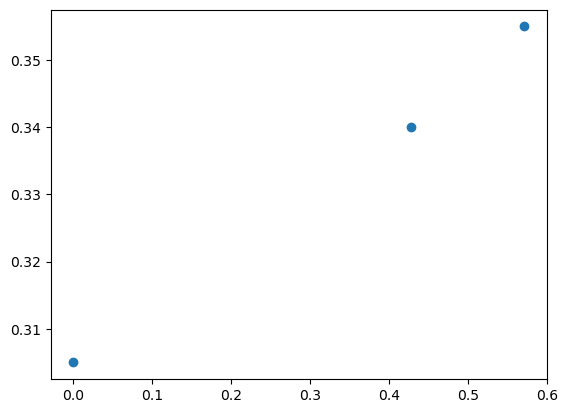

In [37]:
plt.scatter(seats,reps)

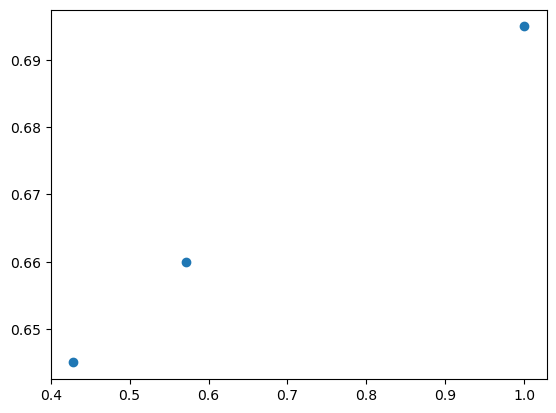

In [38]:
plt.scatter(1-seats, 1-reps)